Thus preventing Heart diseases has become more than necessary. Good data-driven systems for predicting heart diseases can improve the entire research and prevention process, making sure that more people can live healthy lives. This is where Machine Learning comes into play. Machine Learning helps in predicting the Heart diseases, and the predictions made are quite accurate.

The project involved analysis of the heart disease patient dataset with proper data processing. Then, different models were trained and and predictions are made with different algorithms KNN, Decision Tree, Random Forest,SVM,Logistic Regression etc This is the jupyter notebook code and dataset.

I've used a variety of Machine Learning algorithms, implemented in Python, to predict the presence of heart disease in a patient. This is a classification problem, with input features as a variety of parameters, and the target variable as a binary variable, predicting whether heart disease is present or not.

Machine Learning algorithms used:

* Logistic Regression (Scikit-learn)
* Naive Bayes (Scikit-learn)
* K-Nearest Neighbours (Scikit-learn)
* Decision Tree (Scikit-learn)
* Random Forest (Scikit-learn)
* XGBoost (Scikit-learn)

## I. Importing essential libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

## II. Importing and understanding our dataset

In [75]:
dataset = pd.read_csv("heart_2020_cleaned.csv")
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [76]:
dataset.shape

(319795, 18)

In [77]:
dataset.drop(dataset.index[:200000], axis=0, inplace=True)

In [78]:
dataset.shape

(119795, 18)

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119795 entries, 200000 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      119795 non-null  object 
 1   BMI               119795 non-null  float64
 2   Smoking           119795 non-null  object 
 3   AlcoholDrinking   119795 non-null  object 
 4   Stroke            119795 non-null  object 
 5   PhysicalHealth    119795 non-null  float64
 6   MentalHealth      119795 non-null  float64
 7   DiffWalking       119795 non-null  object 
 8   Sex               119795 non-null  object 
 9   AgeCategory       119795 non-null  object 
 10  Race              119795 non-null  object 
 11  Diabetic          119795 non-null  object 
 12  PhysicalActivity  119795 non-null  object 
 13  GenHealth         119795 non-null  object 
 14  SleepTime         119795 non-null  float64
 15  Asthma            119795 non-null  object 
 16  KidneyDisease  

we have no missing values and the dataset looks clean

In [80]:
dataset["HeartDisease"].describe()

count     119795
unique         2
top           No
freq      109488
Name: HeartDisease, dtype: object

No     109488
Yes     10307
Name: HeartDisease, dtype: int64


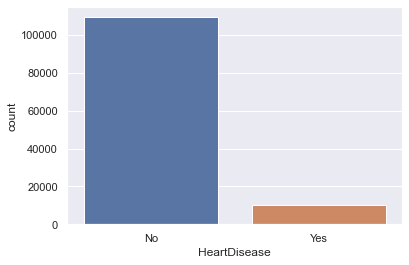

In [81]:
y = dataset["HeartDisease"]

sns.countplot(y)


target_temp = dataset["HeartDisease"].value_counts()

print(target_temp)

In [82]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/319795,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/319795,2)))

Percentage of patience without heart problems: 34.24
Percentage of patience with heart problems: 3.22


looking like we go a problem, the dataset is so imbalanced. Dataset contains 91.44% of "NO HeartDisease" and only 9.56% of heartDiease data

We can use oversampling or upsampling to overcome this problem
Upsampling or Oversampling refers to the technique to create artificial or duplicate data points or of the minority class sample to balance the class label. There are various oversampling techniques that can be used to create artificial data points.

In [83]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = dataset[(dataset['HeartDisease']=="No")] 
df_minority = dataset[(dataset['HeartDisease']=="Yes")] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1311, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

No     109488
Yes      1311
Name: HeartDisease, dtype: int64


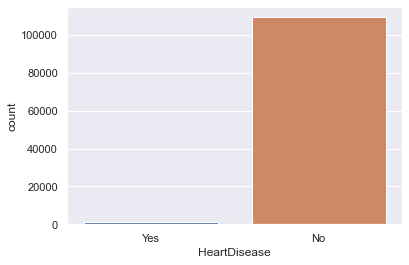

In [84]:
y = df_upsampled["HeartDisease"]

sns.countplot(y)


target_temp = df_upsampled["HeartDisease"].value_counts()

print(target_temp)

In [85]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/df_upsampled.shape[0],2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/df_upsampled.shape[0],2)))

Percentage of patience without heart problems: 98.82
Percentage of patience with heart problems: 1.18


In [86]:
for i in ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']:
    df_upsampled[i]=df_upsampled[i].map(dict(Yes=1, No=0))
df_upsampled = pd.get_dummies(data=df_upsampled, columns=['Sex','Race','AgeCategory','GenHealth','Diabetic'])
df_upsampled
#We converted the heartdisease column from yes/no to 1 and 0
#And added dummies to fix the imbalance of data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
284789,1,22.60,1,0,0,1.0,0.0,1,1,8.0,...,1,0,0,0,0,1,1,0,0,0
211691,1,21.14,0,0,0,4.0,1.0,0,1,7.0,...,0,1,0,0,0,0,1,0,0,0
260996,1,25.68,0,0,0,3.0,0.0,1,0,6.0,...,1,0,0,1,0,0,0,0,1,0
258386,1,31.74,1,0,0,30.0,15.0,0,0,8.0,...,0,0,0,0,1,0,0,0,1,0
264284,1,31.47,0,0,0,0.0,0.0,0,1,8.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,1,8.0,...,0,1,0,0,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,5.0,...,0,0,0,0,0,1,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,6.0,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,12.0,...,0,0,0,1,0,0,1,0,0,0


In [87]:
# importing libraries
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

In [88]:
X = df_upsampled.drop("HeartDisease",axis=1)
Y = df_upsampled["HeartDisease"]

scaler = MinMaxScaler(feature_range=(0, 1))
# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
rescaledX
#It is used on the training data so that we can scale the training data and also learn the scaling parameters.
#Here, the model built will learn the mean and variance of the featuresof the training set. These learned parameters
#are then further used to scale our test data

array([[0.12802517, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11035818, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16529526, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14787028, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25157309, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41795741, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [89]:
from sklearn.model_selection import train_test_split



X_train,X_test,Y_train,Y_test = train_test_split(rescaledX,Y,test_size=0.20,random_state=0)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
from sklearn.linear_model import LogisticRegression
#applying Logistic Regression on Heartdisease Data.
lr = LogisticRegression()
lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [92]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 98.78 %


In [93]:
from sklearn.naive_bayes import GaussianNB
#applying Gaussian Naive Bayes on Heartdisease Data.
nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [94]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 77.54 %


In [95]:
from sklearn.neighbors import KNeighborsClassifier
#applying K-Nearest Neighbour on Heartdisease Data.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [96]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 98.76 %


In [97]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(25):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)



In [98]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 97.7 %


In [99]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(10):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [100]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 98.87 %


In [101]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)


In [102]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 98.78 %


In [103]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 98.78 %
The accuracy score achieved using Naive Bayes is: 77.54 %
The accuracy score achieved using K-Nearest Neighbors is: 98.76 %
The accuracy score achieved using Decision Tree is: 97.7 %
The accuracy score achieved using Random Forest is: 98.87 %
The accuracy score achieved using XGBoost is: 98.78 %


<AxesSubplot: xlabel='Algorithms', ylabel='Accuracy score'>

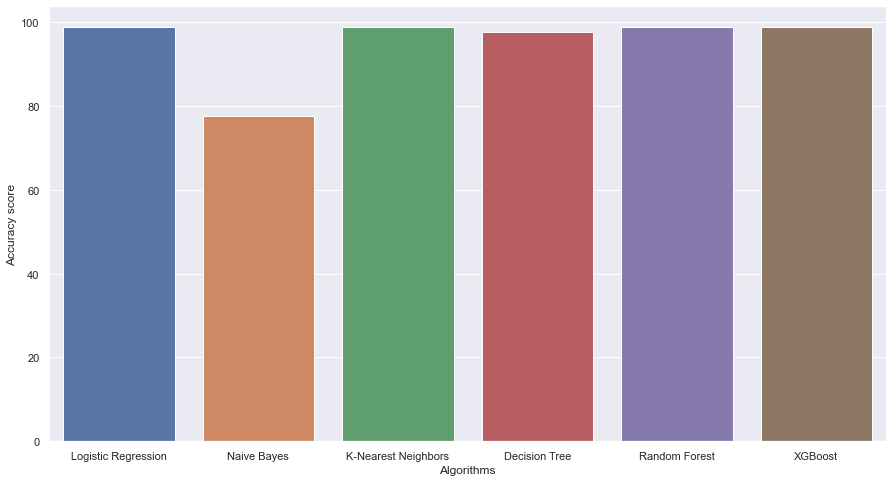

In [104]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
#showing accuracy achived using different algorithms

## random forest has good result as compare to other algorithms

Feature: 0, Score: 49.47500
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 46.40216
Feature: 10, Score: 79.33023
Feature: 11, Score: 97.14084
Feature: 12, Score: -0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 2.54289
Feature: 16, Score: -0.00000
Feature: 17, Score: 0.00000


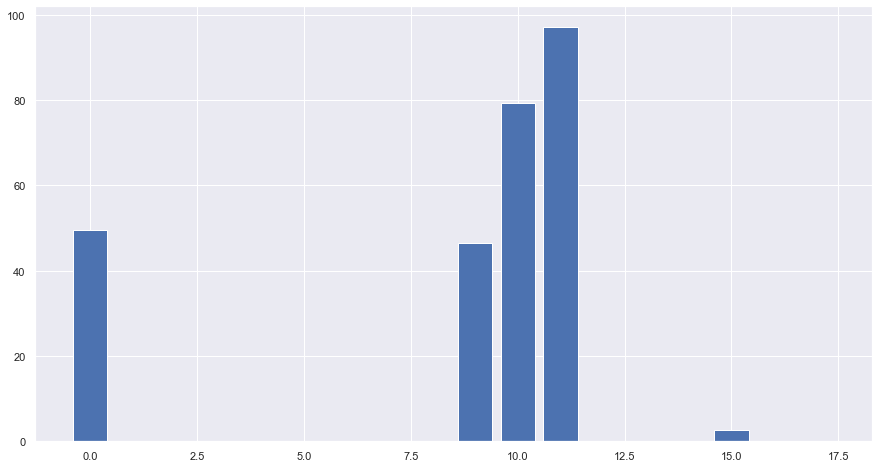

In [105]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X_train,Y_train= make_regression(n_samples=1000, n_features=18, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train,Y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#to get to know the most important feature of the data.

In [106]:
#diabetic and race are most important features.
dataset.corr()
# to show co=realtions of features on each other.

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.105953,0.062307,-0.054358
PhysicalHealth,0.105953,1.000000,0.289432,-0.065010
MentalHealth,0.062307,0.289432,1.000000,-0.122673
SleepTime,-0.054358,-0.065010,-0.122673,1.000000


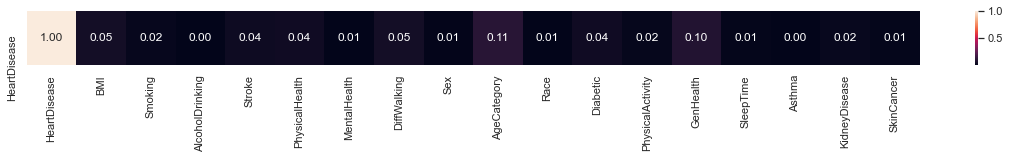

In [107]:

import math 
import scipy.stats as ss #math operations
from collections import Counter
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy


def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x   
theilu = pd.DataFrame(index=['HeartDisease'])
columns = dataset.columns
for j in range(0,len(columns)):
    u = theil_u(dataset['HeartDisease'].tolist(),dataset[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()
# predicting amount of information present in the different features of data

AgeCategory and GenHealth are the most performing features